# Timeline Plot in Python

Code for this tools was inspired by this [helpful stack overflow answer](http://stackoverflow.com/a/23188794/1003437).

### Setup Environment

In [34]:
from collections import OrderedDict

import operator
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

### Setup Data

In [163]:
atlases = {'Desikan': 70,
           'Voxelwise': 1827243,
           'Talairach': 1105,
           'HarvardOxford': 111,
           'AAL': 116,
           'JHU': 48,
           'CPAC': 200,
           'slab1068': 1068,
           'slab907': 907,
           'ND00071': 70,
           'ND00096': 95,
           'ND00108': 107,
           'ND00140': 139,
           'ND00195': 194,
           'ND00278': 278,
           'ND00350': 349,
           'ND00446': 445,
           'ND00583': 582,
           'ND00833': 832,
           'ND01216': 1215,
           'ND01876': 1875,
           'ND03231': 3230,
           'ND06481': 6480,
           'ND16784': 16783,
           'ND72784': 72783}

atl = OrderedDict()
pos = np.array(())
sorted_atlases = sorted(atlases.items(), key=operator.itemgetter(1))
for key, val in sorted_atlases:
    atl[key] = val
    pos = np.append(pos, val)

# Manually skewing some points to minimize overlap
pos = np.linspace(3, 60, len(pos))

### Plot Data

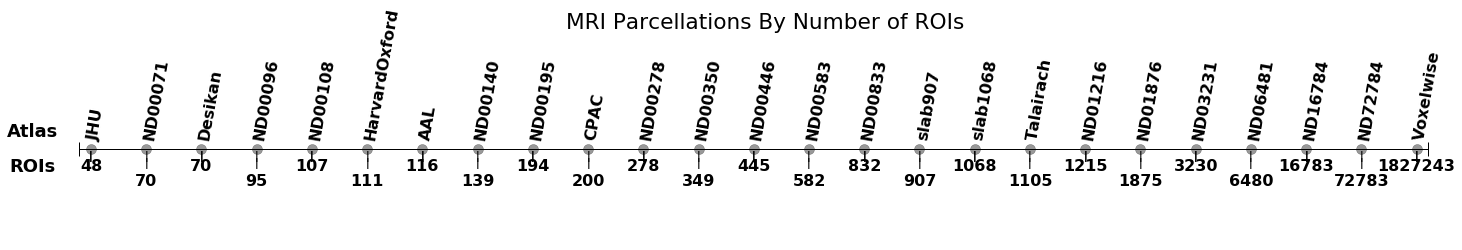

In [221]:
xmin = min((pos))-0.5
xmax = max((pos))+0.5
y = 5
height = 1

ms = 10

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(111)
ax.set_xlim((xmin, xmax+1))
ax.set_ylim((0, 10))
plt.axis('off')

plt.hlines(y, xmin, xmax)
plt.vlines(xmin, y-height/2., y+height/2.)
plt.vlines(xmax, y-height/2., y+height/2.)
plt.hold('on')

for idx, keys in enumerate(atl):
    px = (pos[idx])#+0.5*np.random.rand(1)
    plt.plot(px, y, 'ro', ms=ms, mfc='k', alpha=0.4)
    
    # Label atlas
    ax.text(px-0.2, y+0.5, keys, ha="left", va="bottom", rotation=80,
            size=16)
    
    if idx % 2:
        modif = 1
    else:
        modif = 0
    ax.text(px, y-0.1, '|', ha="center", va="top", rotation=0, size=10)
    ax.text(px, y-0.1-modif/2., '|', ha="center", va="top", rotation=0, size=10)
    ax.text(px, y-0.7-modif, str(atl[keys]), ha="center", va="top", rotation=0,
            size=16)

my_rois = ax.text(xmin-2, y-0.6, "ROIs", ha="center", va="top", rotation=0,
                  size=18)
my_atls = ax.text(xmin-2, y+0.6, "Atlas", ha="center", va="bottom", rotation=0,
                  size=18)
my_title = plt.title('MRI Parcellations By Number of ROIs', y=1.3)
# plt.tight_layout(rect=[.3,0,1,1.3])
plt.tight_layout(rect=[0,0,1,1.28])
plt.savefig('../../figs/graphs/atlases.png', bbox_inches='tight',
            bbox_extra_artists=[my_title, my_atls, my_rois])
plt.show()